
### **1. Text Mining and Sentiment Analysis of Obama’s Tweets**

In [21]:

# Install required libraries
#!pip install nltk wordcloud vaderSentiment matplotlib pandas

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download required nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/dragon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dragon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dragon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:

# Load tweet data
url = 'https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets-obama.csv'
tweets_df = pd.read_csv(url)
tweets_df

,Unnamed: 0,created_at,id,author_id,text
0,0,2022-05-16T21:24:35.000Z,1526312680226799618,813286,"It’s despicable, it’s dangerous — and it needs..."
1,1,2022-05-16T21:24:34.000Z,1526312678951641088,813286,We need to repudiate in the strongest terms th...
2,2,2022-05-16T21:24:34.000Z,1526312677521428480,813286,This weekend’s shootings in Buffalo offer a tr...
3,3,2022-05-16T13:16:16.000Z,1526189794665107457,813286,I’m proud to announce the Voyager Scholarship ...
4,4,2022-05-14T15:03:07.000Z,1525491905139773442,813286,"Across the country, Americans are standing up ..."


In [23]:

# Preprocessing: Lowercase, tokenize, remove stopwords, lemmatize
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 476.7 kB/s eta 0:00:000:00:01m eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


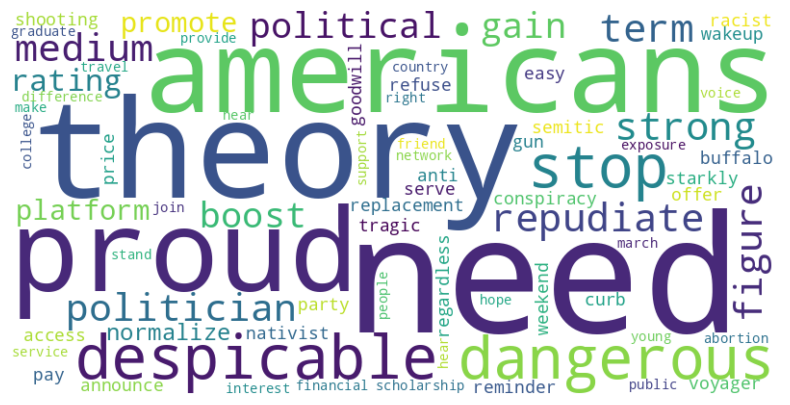

                                                text  \
0  It’s despicable, it’s dangerous — and it needs...   
1  We need to repudiate in the strongest terms th...   
2  This weekend’s shootings in Buffalo offer a tr...   
3  I’m proud to announce the Voyager Scholarship ...   
4  Across the country, Americans are standing up ...   

                                        cleaned_text  sentiment  
0                     despicable dangerous need stop    -0.6486  
1  need repudiate strong term politician medium f...     0.4939  
2  weekend shooting buffalo offer tragic reminder...    -0.1280  
3  proud announce voyager scholarship friend hope...     0.9313  
4  country americans stand abortion right proud m...     0.6486  


In [24]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
#!python3 -m spacy download en_core_web_sm


# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define preprocessing function
def preprocess_text(text):
    # Use spaCy's NLP pipeline to tokenize, lemmatize, and remove stopwords
    doc = nlp(text.lower())
    words = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(words)



# Preprocess the text in the DataFrame
tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)

# Generate Word Cloud
all_words = ' '.join(tweets_df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis using vaderSentiment
tweets_df['sentiment'] = tweets_df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Output the processed data
print(tweets_df[['text', 'cleaned_text', 'sentiment']].head())



### **2. Treemap for Top Management Companies**

In [25]:
import plotly.express as px
import pandas as pd

# Load data (replace with the actual file if available)
top_management_data = pd.read_excel("/home/dragon/GIT/robertnesterodhiambo-Data-analysis/R PROGRAMMING/indinaguy/textanal/ALEKHA DATA EX Week 7 Activity B - Data set.xlsx")

# Create treemap
fig = px.treemap(top_management_data, path=['Sector', 'Company'], values='Score', title="Management Top 25")
fig.show()

# Sector with the most companies and company with the highest score
sector_group = top_management_data.groupby('Sector')['Company'].count().idxmax()
highest_score_company = top_management_data.loc[top_management_data['Sector'] == sector_group].nlargest(1, 'Score')['Company'].values[0]
print(f"Sector with the most companies: {sector_group}")
print(f"Highest composite score in that sector: {highest_score_company}")


Sector with the most companies: Technology
Highest composite score in that sector: Amazon



### **3. Choropleth for Biodiversity**

In [ ]:

# Install geopandas if needed
#!pip install geopandas plotly

import pandas as pd
import plotly.express as px

# Load data (replace with actual file if available)
biodiversity_data = pd.read_excel("Biodiversity Preservation.xlsx")

# Create choropleth map
fig = px.choropleth(biodiversity_data, locations='State', locationmode='USA-states', 
                    color='Number of Species', 
                    scope='usa',
                    title='Number of Species per State',
                    labels={'Number of Species':'Species Count'})
fig.show()

# Regions with high and low biodiversity
most_species_states = biodiversity_data.nlargest(2, 'Number of Species')['State'].values
print(f"Two states with the most species: {most_species_states}")


### **4. Waterfall Chart for Bellevue Bakery Income Statement**

In [ ]:


import pandas as pd
import plotly.graph_objects as go

# Load data (replace with actual file if available)
income_statement = pd.read_excel("Income Statement.xlsx")

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    x=income_statement['Category'], 
    y=income_statement['Amount'],
    textposition="outside",
    text=income_statement['Amount'],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))

fig.update_layout(
    title="Bellevue Bakery Income Statement",
    waterfallgap=0.3,
)

fig.show()




### **5. Heat Map for Population Migration**

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (replace with actual file if available)
migration_data = pd.read_excel("Migration Data.xlsx")

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(migration_data.pivot_table(values='Net Migration Rate', index='Region', columns='State'), cmap="coolwarm", annot=True)
plt.title("Net Migration Rate by State and Region")
plt.show()

# Regions gaining and losing population
gaining_regions = migration_data[migration_data['Net Migration Rate'] > 0]['Region'].unique()
losing_regions = migration_data[migration_data['Net Migration Rate'] < 0]['Region'].unique()
print(f"Regions gaining population: {gaining_regions}")
print(f"Regions losing population: {losing_regions}")




### **6. Term-Document Incidence Matrix**

In [26]:

# Given matrix
import numpy as np
documents = np.array([[1, 1, 0, 1, 0, 0], [1, 1, 0, 1, 1, 1], [0, 1, 0, 0, 0, 0]])

# Boolean query: Brutus AND Caesar AND NOT Calpurnia
result = np.logical_and(documents[0], documents[1])
result = np.logical_and(result, np.logical_not(documents[2]))

# Output documents that match the query
matching_docs = np.where(result == 1)[0] + 1  # +1 to match document numbering
print(f"Documents matching the query: d{matching_docs}")


Documents matching the query: d[1 4]



### **7. Cosine Similarity Calculation**

In [27]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a corpus for the three documents
corpus = ['linus 10 snoopy 1 pumpkin 4', 'snoopy 4', 'linus 1 pumpkin 10']

# Create query
query = ['linus pumpkin']

# Use TfidfVectorizer to calculate TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus + query)

# Calculate cosine similarity
cos_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Output results
print(f"Cosine similarity with Doc1: {cos_sim[0][0]}")
print(f"Cosine similarity with Doc2: {cos_sim[0][1]}")
print(f"Cosine similarity with Doc3: {cos_sim[0][2]}")

Cosine similarity with Doc1: 0.6292275146695527
Cosine similarity with Doc2: 0.0
Cosine similarity with Doc3: 0.7531670429349948
